##### This project seeks to develop a model (classification model ) that can predidct the outcome of breast cancer surgery. The dataset consists of a group of breast cancer patients, who had surgery to remove their tumour. The dataset consists of the following variables:
##### Source: Kaggle
##### Patient_ID: unique identifier id of a patient.
##### Age: age at diagnosis (Years)
##### Gender: Male/Female
##### Protein1, Protein2, Protein3, Protein4: expression levels (undefined units)
##### Tumour Stage: I, II, III
##### Histology: Infiltrating Ductal Carcinoma, Infiltrating Lobular Carcinoma, Mucinous Carcinoma
##### ER status: Positive/Negative
##### PR status: Positive/Negative
##### HER2 status: Positive/Negative
##### Surgery type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other
##### Date_of_Surgery: Date on which surgery was performed (in DD-MON-YY)
##### Date_of_Last_Visit: Date of last visit (in DD-MON-YY) [can be null, in case the patient didn’t visit again after the surgery]
##### Patient Status: Alive/Dead [can be null, in case the patient didn’t visit again after the surgery and there is no information available whether the patient is alive or dead].


In [1]:
# To bring in the libraries
import pandas as pd
import numpy as np

In [2]:
# To bring in the dataset
df = pd.read_csv(r"C:\Users\user\Desktop\data source\breast_cancer.csv")

In [3]:
# To view the top end of the dataset
df.head(5)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
# To check for number of rows and columns
print(('There are {} rows and {} columns').format(df.shape[0], df.shape[1]))

There are 341 rows and 16 columns


In [5]:
# To check the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [6]:
# To check for missing values in absolute terms in the dataset
missing = df.isnull().sum()
missing = missing[missing > 0]
missing

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [7]:
# To display the missing values in the dataset by percentages in the order of highest to lowest
pd.DataFrame(data = {"% of Missing Values": round(df.isnull().sum()/df.isnull().count()*100,2)}).sort_values(by = "% of Missing Values", ascending = False)

,% of Missing Values
Date_of_Last_Visit,7.04
Patient_Status,5.87
Patient_ID,2.05
Age,2.05
Gender,2.05
Protein1,2.05
Protein2,2.05
Protein3,2.05
Protein4,2.05
Tumour_Stage,2.05


In [8]:
# To get the categorial columns
cat_col = [col for col in df.columns if df[col].dtypes == 'O']
print(cat_col)

['Patient_ID', 'Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status']


In [9]:
# To get the numerical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
print(num_col)

['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']


In [10]:
# To get the length/count of unique values in each column
for col in df.columns:
    values = df[col].nunique()
    print(f'{col}:{values}')

Patient_ID:334
Age:57
Gender:2
Protein1:333
Protein2:334
Protein3:334
Protein4:333
Tumour_Stage:3
Histology:3
ER status:1
PR status:1
HER2 status:2
Surgery_type:4
Date_of_Surgery:181
Date_of_Last_Visit:285
Patient_Status:2


In [11]:
# To obatin the unique values contained in the different columns in the dataset
for col in df.columns:
    values = df[col].unique()
    print(f'{col}:{values}')

Patient_ID:['TCGA-D8-A1XD' 'TCGA-EW-A1OX' 'TCGA-A8-A079' 'TCGA-D8-A1XR'
 'TCGA-BH-A0BF' 'TCGA-AO-A1KQ' 'TCGA-D8-A73X' 'TCGA-A7-A426'
 'TCGA-EW-A1P5' 'TCGA-A8-A09A' 'TCGA-S3-A6ZG' 'TCGA-BH-A0EA'
 'TCGA-AC-A8OR' 'TCGA-A2-A0ES' 'TCGA-C8-A8HQ' 'TCGA-AO-A03V'
 'TCGA-A2-A0D4' 'TCGA-EW-A1PA' 'TCGA-BH-A0DE' 'TCGA-E2-A1B4'
 'TCGA-AC-A3HN' 'TCGA-A8-A095' 'TCGA-AN-A0FY' 'TCGA-A2-A4S0'
 'TCGA-A7-A3J0' 'TCGA-AC-A62Y' 'TCGA-A7-A5ZW' 'TCGA-A2-A25C'
 'TCGA-D8-A1JC' 'TCGA-A7-A4SB' 'TCGA-AR-A24S' 'TCGA-D8-A4Z1'
 'TCGA-A7-A26J' 'TCGA-AC-A5XS' 'TCGA-OL-A6VR' 'TCGA-EW-A1PF'
 'TCGA-LL-A7SZ' 'TCGA-BH-A18K' 'TCGA-AC-A3OD' 'TCGA-BH-A8FY'
 'TCGA-C8-A26Z' 'TCGA-A2-A1G4' 'TCGA-BH-A18F' 'TCGA-E2-A1IG'
 'TCGA-AC-A2B8' 'TCGA-BH-A0BT' 'TCGA-AO-A125' 'TCGA-A8-A07E'
 'TCGA-A8-A08A' 'TCGA-A2-A0EX' 'TCGA-A8-A093' 'TCGA-E2-A1L6'
 'TCGA-3C-AAAU' 'TCGA-E2-A1IL' 'TCGA-A2-A0CO' 'TCGA-BH-A0E7'
 'TCGA-EW-A6SC' 'TCGA-D8-A1X7' 'TCGA-D8-A1XM' 'TCGA-A1-A0SF'
 'TCGA-EW-A1J5' 'TCGA-BH-A0AY' 'TCGA-E2-A15G' 'TCGA-A8-A09B'
 'TCGA-BH-A0H

In [12]:
# To check for duplicates 
df.duplicated().sum()

6

In [13]:
# To get a sample of the dataset in a bid to have a sense of the cleaning work required
df.sample(10).T

,282,270,284,99,333,66,168,244,191,188
Patient_ID,TCGA-EW-A1IZ,TCGA-A8-A0A9,TCGA-BH-A0HX,TCGA-A8-A06O,TCGA-B6-A40B,TCGA-BH-A0BD,TCGA-AR-A1AK,TCGA-E9-A5FK,TCGA-BH-A0DH,TCGA-AR-A1AN
Age,53.0,80.0,54.0,60.0,76.0,47.0,70.0,60.0,63.0,46.0
Gender,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE,FEMALE
Protein1,0.26748,-0.31038,-1.3791,0.53242,-0.24427,0.12107,0.70029,0.20862,-0.55957,0.52751
Protein2,1.6773,2.22,1.6607,1.5411,0.92556,0.78513,0.97347,-0.56103,0.48445,-0.62123
Protein3,-0.17536,-0.55634,-0.15662,-1.0095,-0.41823,-0.19762,-0.29645,1.2385,0.081055,-0.54699
Protein4,0.46565,0.52372,-0.41103,-0.12588,-0.067848,0.35245,0.10551,0.96681,0.60983,0.39106
Tumour_Stage,III,II,II,I,I,II,I,III,II,II
Histology,Infiltrating Ductal Carcinoma,Infiltrating Ductal Carcinoma,Infiltrating Ductal Carcinoma,Infiltrating Ductal Carcinoma,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Infiltrating Ductal Carcinoma,Infiltrating Ductal Carcinoma,Infiltrating Ductal Carcinoma,Infiltrating Ductal Carcinoma
ER status,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive


##### After review of the dataset, is observed that not much cleaning is required except for the following:
##### The missing values, the duplicates, the needless column to be expounged and reconverting the date type . Next section addresses them.

In [14]:
# Date_of_Last_Visit 
df['Date_of_Last_Visit'].value_counts().sort_values(ascending = False)


Date_of_Last_Visit
20-Feb-20    3
09-Aug-19    3
13-Feb-21    3
15-Jan-20    3
03-Feb-21    3
            ..
26-Feb-20    1
02-Apr-20    1
10-Sep-20    1
28-Jan-20    1
19-Feb-21    1
Name: count, Length: 285, dtype: int64

In [15]:
# Since 20-Feb-20 is the most appeared date. is used to fill up the gaps in Date_of_Last_Visit 
df['Date_of_Last_Visit'].fillna('20-Feb-20', inplace = True)

In [16]:
# Patient_Status
df['Patient_Status'].value_counts().sort_values(ascending = False)

Patient_Status
Alive    255
Dead      66
Name: count, dtype: int64

In [17]:
# Since alive appeared the most. is used to fill up the gaps in Patient_Status
df['Patient_Status'].fillna('Alive', inplace = True)

In [18]:
# Age - The median value is used to fill up the gaps
df['Age'].median()


58.0

In [19]:
df['Age'].fillna('58', inplace = True)

In [20]:
# Gender
df['Gender'].value_counts().sort_values(ascending = False)

Gender
FEMALE    330
MALE        4
Name: count, dtype: int64

In [21]:
# The femal gender is used to fill up the gas owning largly to the fact that women are more prone to breast cancer
df['Gender'].fillna('FEMALE', inplace = True)

In [22]:
# Protein 1. The median value to be used to fill up the gaps
df['Protein1'].median()

0.00612935

In [23]:
df['Protein1'].fillna('0.00612935', inplace = True)

In [24]:
# Protein 2. The median value to be used too
df['Protein2'].median()

0.9928049999999999

In [25]:
df['Protein2'].fillna('0.9928049999999999', inplace = True)

In [26]:
# Protein 3. The median value to be used too
df['Protein3'].median()

-0.17318

In [27]:
df['Protein3'].fillna('-0.17318', inplace = True)

In [28]:
# Protein 4. The median value to be used too
df['Protein4'].median()

0.041768

In [29]:
df['Protein4'].fillna('0.041768', inplace = True)

In [30]:
# Tumour_Stage
df['Tumour_Stage'].value_counts().sort_values(ascending = False)

Tumour_Stage
II     189
III     81
I       64
Name: count, dtype: int64

In [31]:
# the value - II is applied to fill up gaps
df['Tumour_Stage'].fillna('II', inplace = True)

In [32]:
# Histology
df['Histology'].value_counts().sort_values(ascending = False)

Histology
Infiltrating Ductal Carcinoma     233
Infiltrating Lobular Carcinoma     89
Mucinous Carcinoma                 12
Name: count, dtype: int64

In [33]:
# This -Infiltrating Ductal Carcinoma is used to fill up gaps
df['Histology'].fillna('Infiltrating Ductal Carcinoma ', inplace = True)

In [34]:
# ER status
df['ER status'].value_counts().sort_values(ascending = False)

ER status
Positive    334
Name: count, dtype: int64

In [35]:
df['ER status'].fillna('Positive', inplace = True)

In [36]:
# PR status
df['PR status'].value_counts().sort_values(ascending = False)

PR status
Positive    334
Name: count, dtype: int64

In [37]:
df['PR status'].fillna('Positive', inplace = True)

In [38]:
# HER2 status
df['HER2 status'].value_counts().sort_values(ascending = False)

HER2 status
Negative    305
Positive     29
Name: count, dtype: int64

In [39]:
df['HER2 status'].fillna('Negative', inplace = True)

In [40]:
# Surgery_type
df['Surgery_type'].value_counts().sort_values(ascending = False)

Surgery_type
Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: count, dtype: int64

In [41]:
df['Surgery_type'].fillna('Other', inplace = True)

In [42]:
df['Date_of_Surgery'].value_counts().sort_values(ascending = False)

Date_of_Surgery
06-Nov-18    5
26-Nov-18    5
06-Dec-18    5
16-Nov-18    5
27-Oct-18    4
            ..
25-Apr-17    1
05-May-17    1
15-May-17    1
25-May-17    1
21-Nov-19    1
Name: count, Length: 181, dtype: int64

In [43]:
df['Date_of_Surgery'].fillna('06-Nov-18', inplace = True)

In [44]:
# Drop Patient_ID column as is not needed in the task
df.drop(columns = 'Patient_ID', inplace = True)

In [45]:
# Confirm that all missing values are sorted and needless column dropped
df.isnull().sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [46]:
# To convert the Date_of_Surgery and Date_of_Last_Visit to datetime fromm date-string 
from datetime import datetime
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'], format = '%d-%b-%y')
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'], format = '%d-%b-%y')

In [47]:
# To retain the original format for Age & Protein1-4
df['Age'] = df['Age'].astype(float)
df['Protein1'] = df['Protein1'].astype(float)
df['Protein2'] = df['Protein2'].astype(float)
df['Protein3'] = df['Protein3'].astype(float)
df['Protein4'] = df['Protein4'].astype(float)

In [48]:
# To confirm operation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 341 non-null    float64       
 1   Gender              341 non-null    object        
 2   Protein1            341 non-null    float64       
 3   Protein2            341 non-null    float64       
 4   Protein3            341 non-null    float64       
 5   Protein4            341 non-null    float64       
 6   Tumour_Stage        341 non-null    object        
 7   Histology           341 non-null    object        
 8   ER status           341 non-null    object        
 9   PR status           341 non-null    object        
 10  HER2 status         341 non-null    object        
 11  Surgery_type        341 non-null    object        
 12  Date_of_Surgery     341 non-null    datetime64[ns]
 13  Date_of_Last_Visit  341 non-null    datetime64[ns]

In [49]:
# To find the duplicates in the dataset and have them displayed across the columns
duplicated_rows = df[df.duplicated()]
duplicated_rows

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
335,58.0,FEMALE,0.006129,0.992805,-0.17318,0.041768,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-06,2020-02-20,Alive
336,58.0,FEMALE,0.006129,0.992805,-0.17318,0.041768,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-06,2020-02-20,Alive
337,58.0,FEMALE,0.006129,0.992805,-0.17318,0.041768,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-06,2020-02-20,Alive
338,58.0,FEMALE,0.006129,0.992805,-0.17318,0.041768,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-06,2020-02-20,Alive
339,58.0,FEMALE,0.006129,0.992805,-0.17318,0.041768,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-06,2020-02-20,Alive
340,58.0,FEMALE,0.006129,0.992805,-0.17318,0.041768,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-06,2020-02-20,Alive


In [50]:
# To get rid of the duplicates in the dataset
df = df.drop_duplicates()

In [51]:
# To check operation and confirm that all duplicates have been eliminated
df.duplicated().sum()

0

##### This section deals with Exploratory Data Analysis (EDA).  Univariate Analysis will be done for the features.

In [52]:
# Bring in the Libraries
import matplotlib.pyplot as plt
import seaborn as sns

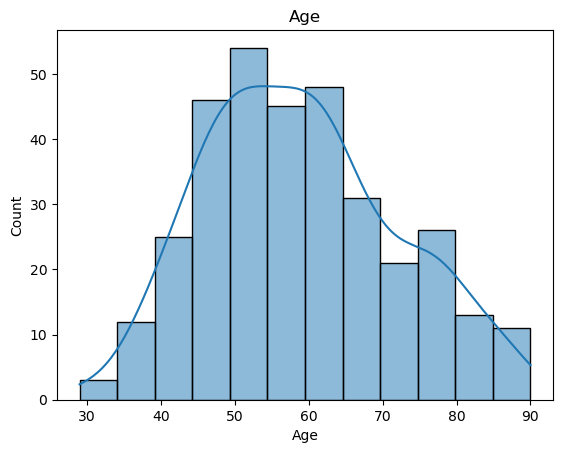

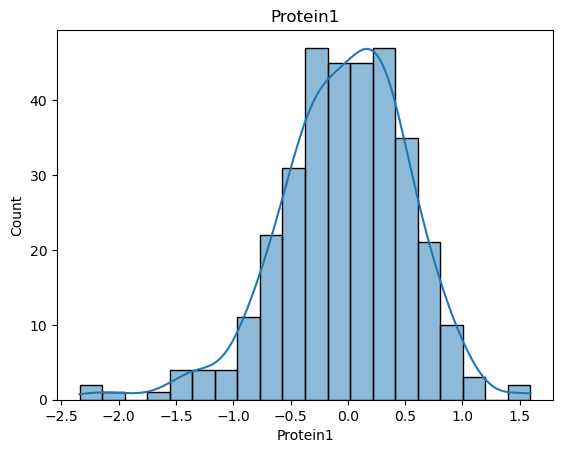

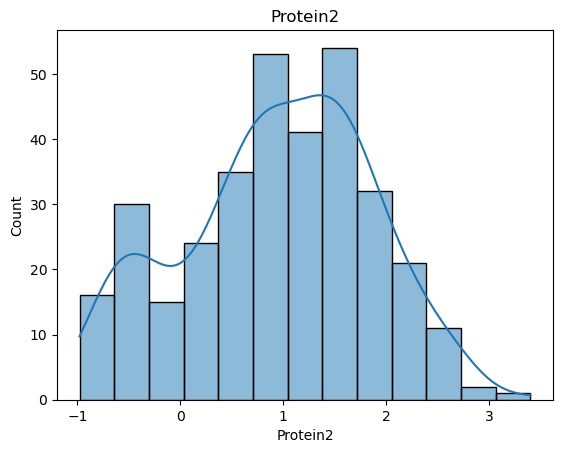

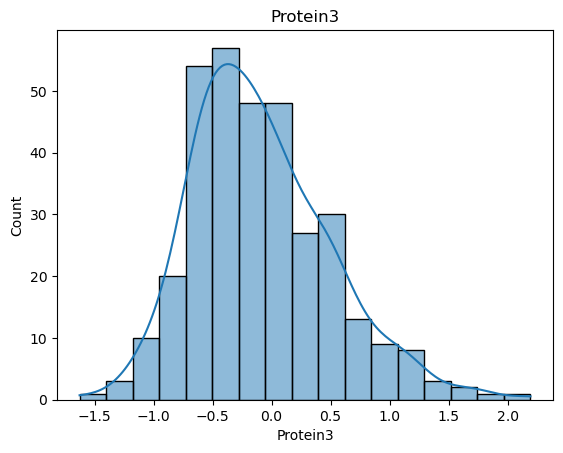

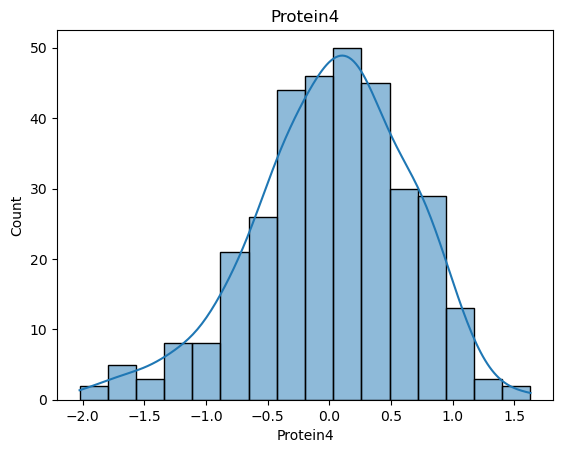

In [53]:
numeric_features = [numeric for numeric in df.columns if df[numeric].dtypes!='O'and df[numeric].dtypes != 'datetime64[ns]']

for features in numeric_features:
        sns.histplot(df[features], kde = True)
        plt.title(features)
        plt.show()

In [54]:
# For the categorical colunms, a univairate analysis is also done
# Countplot is adopted to better undersand the varibales

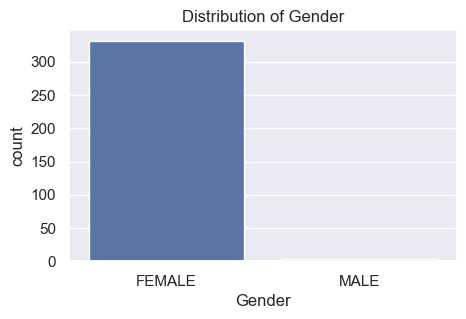

In [55]:
# For Gender
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x = 'Gender', data = df)
plt.title('Distribution of Gender')
plt.show()

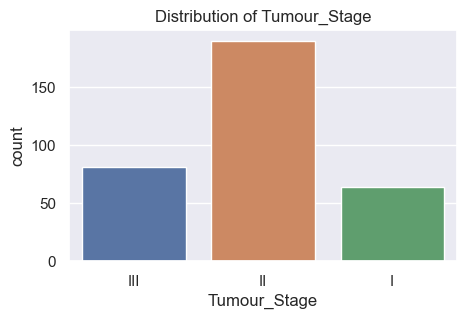

In [56]:
# For Tumour_Stage
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x ='Tumour_Stage', data = df)
plt.title('Distribution of Tumour_Stage')
plt.show()

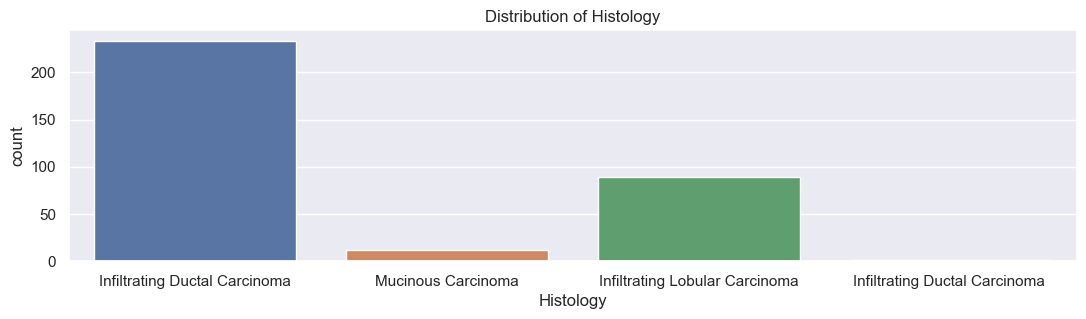

In [57]:
# For Histology
sns.set(rc = {'figure.figsize':(13,3)})
sns.countplot(x ='Histology', data = df)
plt.title('Distribution of Histology')
plt.show()

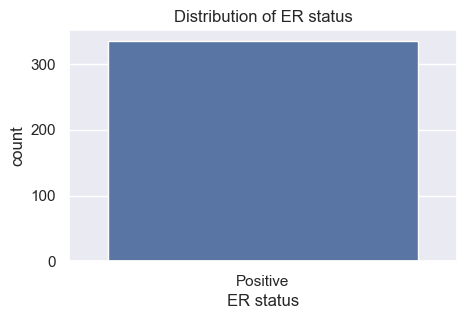

In [58]:
# For ER status
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x ='ER status', data = df)
plt.title('Distribution of ER status')
plt.show()


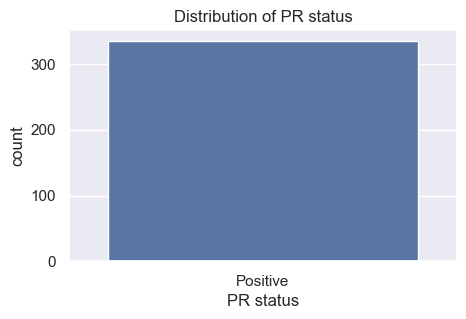

In [59]:
# For PR status
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x ='PR status', data = df)
plt.title('Distribution of PR status')
plt.show()


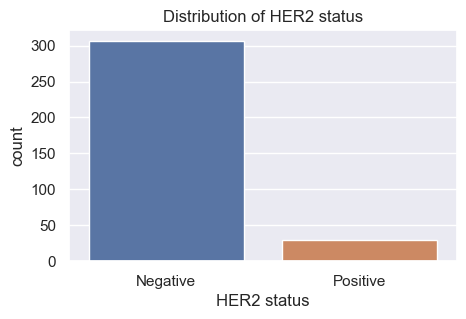

In [60]:
# For HER2 status
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x ='HER2 status', data = df)
plt.title('Distribution of HER2 status')
plt.show()


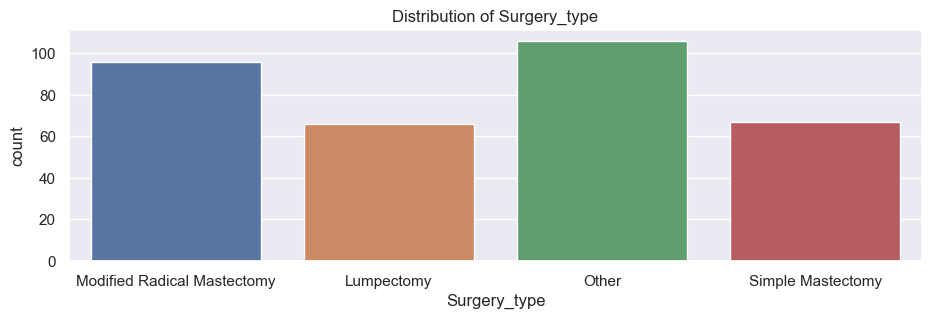

In [61]:
# For Surgery_type
sns.set(rc = {'figure.figsize':(11,3)})
sns.countplot(x ='Surgery_type', data = df)
plt.title('Distribution of Surgery_type')
plt.show()


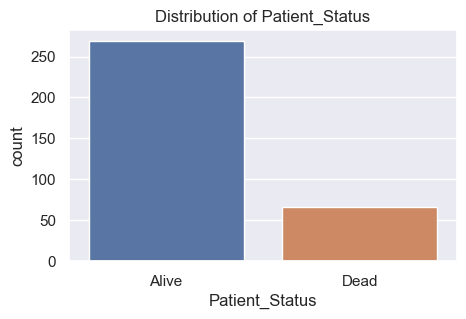

In [62]:
# For Patient_Status
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x ='Patient_Status', data = df)
plt.title('Distribution of Patient_Status')
plt.show()


##### This section seeks to identify outliers and tackling them using a boxplot

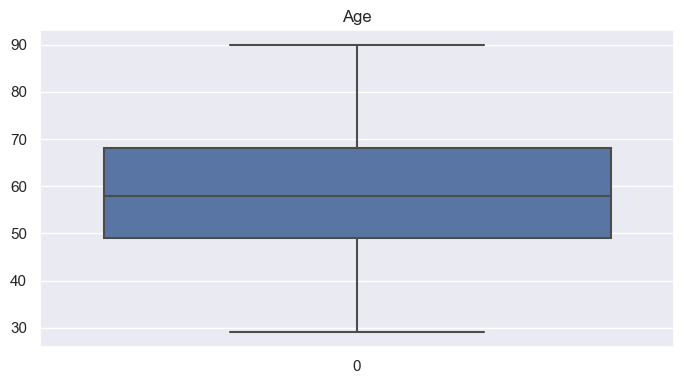

In [63]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Age'])
plt.title('Age')
plt.tight_layout()
plt.show()

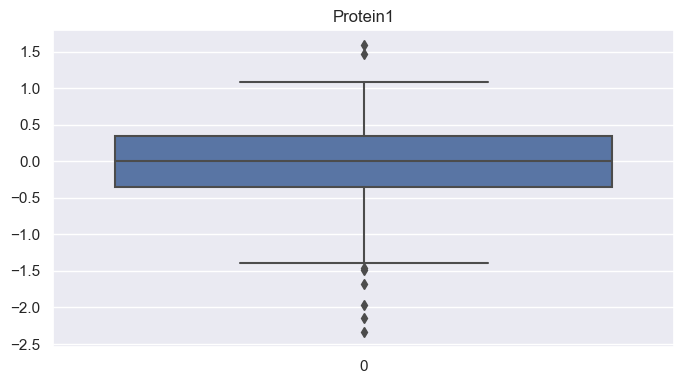

In [64]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Protein1'])
plt.title('Protein1')
plt.tight_layout()
plt.show()

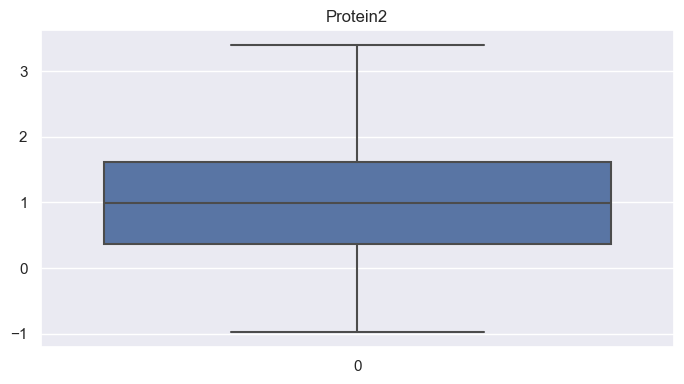

In [65]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Protein2'])
plt.title('Protein2')
plt.tight_layout()
plt.show()

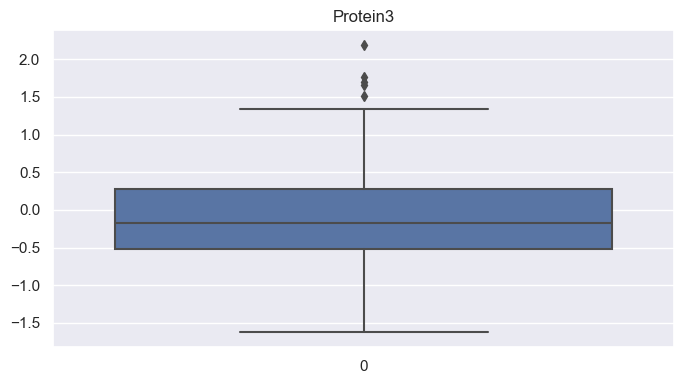

In [66]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Protein3'])
plt.title('Protein3')
plt.tight_layout()
plt.show()

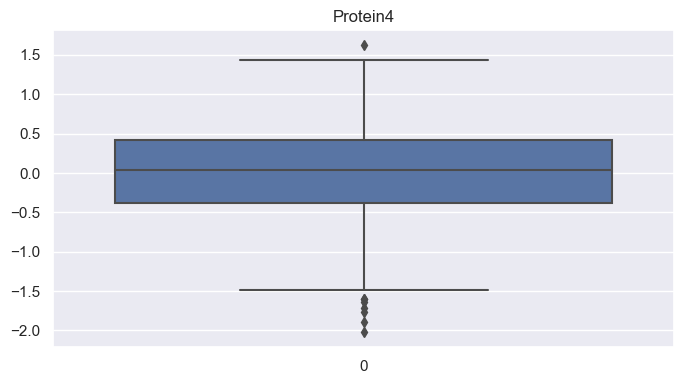

In [67]:
plt.figure(figsize = (7,4))
sns.boxplot(data = df['Protein4'])
plt.title('Protein4')
plt.tight_layout()
plt.show()

In [68]:
# Calling up the number summary
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,335.0,58.883582,29.0,49.0,58.0,68.0,90.0,12.941885
Protein1,335.0,-0.029883,-2.3409,-0.356125,0.006129,0.342105,1.5936,0.562747
Protein2,335.0,0.947033,-0.97873,0.364395,0.992805,1.6226,3.4022,0.910275
Protein3,335.0,-0.090452,-1.6274,-0.513735,-0.17318,0.277445,2.1934,0.584316
Protein4,335.0,0.009915,-2.0255,-0.37611,0.041768,0.4224,1.6299,0.628115
Date_of_Surgery,335,2018-09-08 04:52:17.910447872,2017-01-15 00:00:00,2018-03-11 00:00:00,2018-10-07 00:00:00,2019-04-03 00:00:00,2019-11-21 00:00:00,NaN
Date_of_Last_Visit,335,2019-11-30 17:20:14.328358144,2017-04-05 00:00:00,2019-02-18 12:00:00,2020-01-29 00:00:00,2020-08-13 00:00:00,2026-09-24 00:00:00,NaN


In [69]:
# To handle the outliers, Interquartile Range (IQR) is computed and applied using the above number summary.
# For Protein 1
# Calculate Q1, Q3, and IQR
Q1 = df['Protein1'].quantile(0.25)
Q3 = df['Protein1'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-1.40347
1.38945


In [70]:
# Applying the values to the column
df['Protein1'] = df['Protein1'].apply(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else None)

In [71]:
# For Protein 3
# Calculate Q1, Q3, and IQR
Q1 = df['Protein3'].quantile(0.25)
Q3 = df['Protein3'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-1.7005050000000002
1.464215


In [72]:
# Applying the values to the column
df['Protein3'] = df['Protein3'].apply(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else None)

In [73]:
# For Protein 4
# Calculate Q1, Q3, and IQR
Q1 = df['Protein4'].quantile(0.25)
Q3 = df['Protein4'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-1.573875
1.620165


In [74]:
# Applying the values to the column
df['Protein4'] = df['Protein4'].apply(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else None)

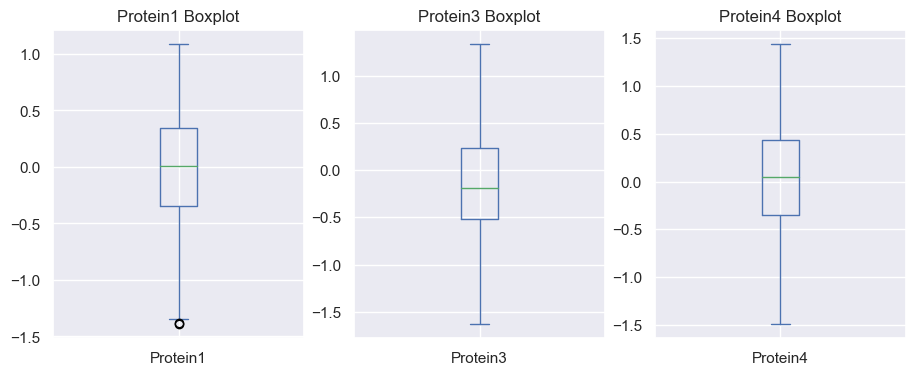

In [75]:
# Next is to check that the outliers have been taken care of
# The boxplot will confirm

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 4))

# Plot boxplot for each column
df['Protein1'].plot(kind='box', ax=axes[0])
df['Protein3'].plot(kind='box', ax=axes[1])
df['Protein4'].plot(kind='box', ax=axes[2])

# Set titles and labels
axes[0].set_title('Protein1 Boxplot')
axes[1].set_title('Protein3 Boxplot')
axes[2].set_title('Protein4 Boxplot')

plt.show()

In [77]:
# Dropping few rows as a result of operations 
columns_to_drop_na = ['Protein1', 'Protein3', 'Protein4']

# Drop NaN values in the specified columns
df.dropna(subset=columns_to_drop_na, inplace=True)

# To reset the index after dropping NaN values
df.reset_index(drop=True, inplace=True)

In [78]:
# To confirm no nan values
df.isnull().sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

###### This section deals with Bivariate Analysis looking at the relationship between the input numerical variables and the target variable. A t-test and  barplot are adopted.

In [79]:
# To bring in the stat library
from scipy import stats
import statistics as stat

In [80]:
# Separate data into two groups based on 'Patient_Status'
group_alive = df[df['Patient_Status'] == 'Alive']['Age']
group_dead = df[df['Patient_Status'] == 'Dead']['Age']

In [81]:
# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(group_alive, group_dead)

# Display results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -0.03556578457165831
p-value: 0.9716512618753295


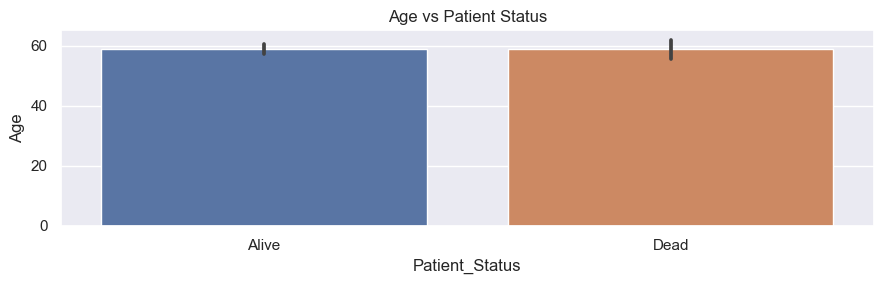

In [82]:
sns.set(rc = {'figure.figsize':(9,3)})
sns.barplot(data = df, y ='Age', x = 'Patient_Status')
plt.title('Age vs Patient Status')
plt.tight_layout()
plt.show()

In [83]:
# The same t-test was applied on the features (Protein 1 - 4), but due to very low variability it returned a NaN
# Hence the barplot for the features

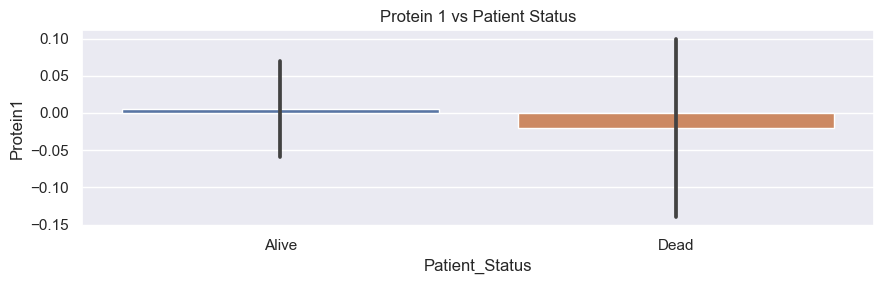

In [84]:
sns.set(rc = {'figure.figsize':(9,3)})
sns.barplot(data = df, y ='Protein1', x = 'Patient_Status')
plt.title('Protein 1 vs Patient Status')
plt.tight_layout()
plt.show()

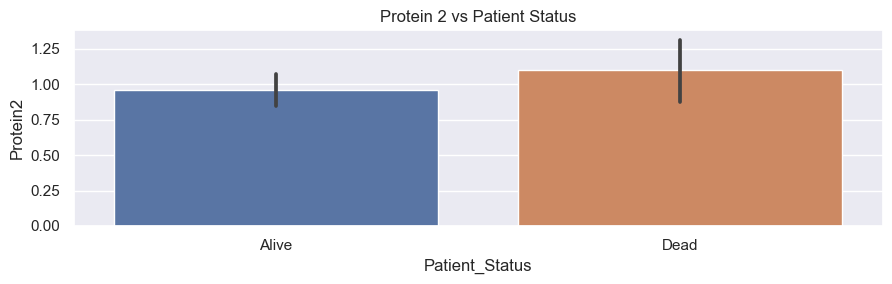

In [85]:
sns.set(rc = {'figure.figsize':(9,3)})
sns.barplot(data = df, y ='Protein2', x = 'Patient_Status')
plt.title('Protein 2 vs Patient Status')
plt.tight_layout()
plt.show()

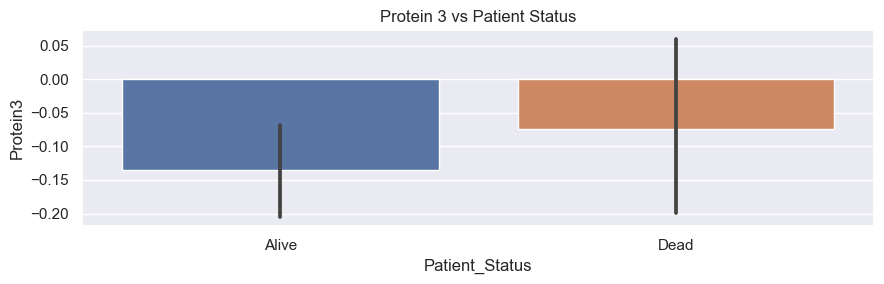

In [86]:
sns.set(rc = {'figure.figsize':(9,3)})
sns.barplot(data = df, y ='Protein3', x = 'Patient_Status')
plt.title('Protein 3 vs Patient Status')
plt.tight_layout()
plt.show()

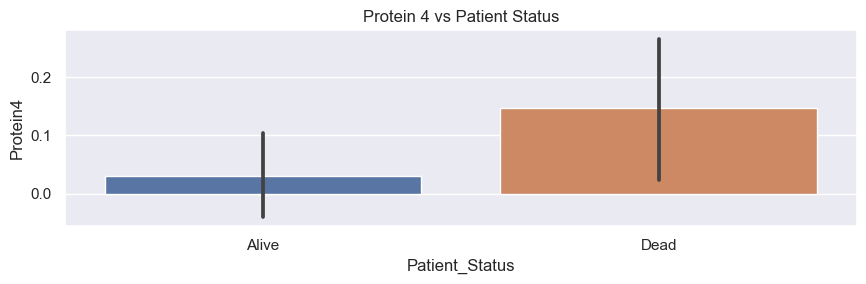

In [87]:
sns.set(rc = {'figure.figsize':(9,3)})
sns.barplot(data = df, y ='Protein4', x = 'Patient_Status')
plt.title('Protein 4 vs Patient Status')
plt.tight_layout()
plt.show()

##### This section looks at categorical variables in relation to the target variable which is also  categorial. The chi-square is used for analysis while the  clustered barchart is used for visualization . All the categorical varibales will be treated.

In [88]:
# Bringing the library
from scipy.stats import chi2_contingency

In [89]:
# Contingency table for chi-square test
contingency_table = pd.crosstab(df['Gender'], df['Patient_Status'])

# Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies:
 [[250.59047619  61.40952381]
 [  2.40952381   0.59047619]]


In [90]:
# Contingency table for chi-square test
contingency_table = pd.crosstab(df['Tumour_Stage'], df['Patient_Status'])

# Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 1.362978644291347
p-value: 0.5058630380392835
Degrees of freedom: 2
Expected frequencies:
 [[ 50.6         12.4       ]
 [141.35873016  34.64126984]
 [ 61.04126984  14.95873016]]


In [91]:
#Contingency table for chi-square test
contingency_table = pd.crosstab(df['Histology'], df['Patient_Status'])

# Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 0.3435080676105133
p-value: 0.9516484350731115
Degrees of freedom: 3
Expected frequencies:
 [[175.09206349  42.90793651]
 [  0.8031746    0.1968254 ]
 [ 69.07301587  16.92698413]
 [  8.03174603   1.96825397]]


In [92]:
#Contingency table for chi-square test
contingency_table = pd.crosstab(df['ER status'], df['Patient_Status'])

# Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 0
Expected frequencies:
 [[253.  62.]]


In [93]:
#Contingency table for chi-square test
contingency_table = pd.crosstab(df['PR status'], df['Patient_Status'])

# Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 0
Expected frequencies:
 [[253.  62.]]


In [94]:
#Contingency table for chi-square test
contingency_table = pd.crosstab(df['HER2 status'], df['Patient_Status'])

# Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 0.8434795558141016
p-value: 0.3584035086527757
Degrees of freedom: 1
Expected frequencies:
 [[231.31428571  56.68571429]
 [ 21.68571429   5.31428571]]


In [95]:
#Contingency table for chi-square test
contingency_table = pd.crosstab(df['Surgery_type'], df['Patient_Status'])

# Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 3.5505059619173798
p-value: 0.3142705027023072
Degrees of freedom: 3
Expected frequencies:
 [[50.6        12.4       ]
 [73.08888889 17.91111111]
 [77.90793651 19.09206349]
 [51.4031746  12.5968254 ]]


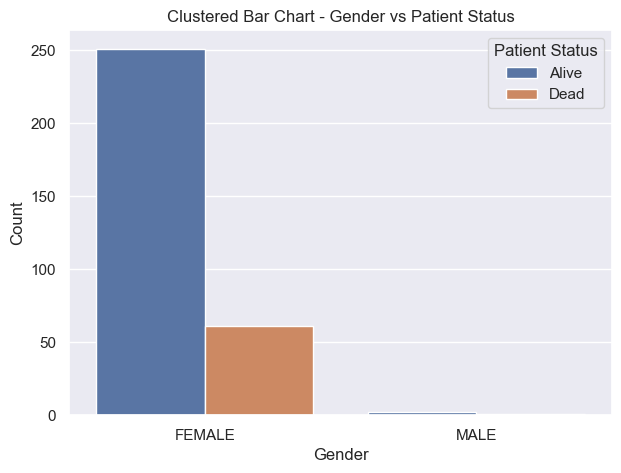

In [96]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', hue='Patient_Status', data=df)
plt.title('Clustered Bar Chart - Gender vs Patient Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Patient Status')
plt.show()

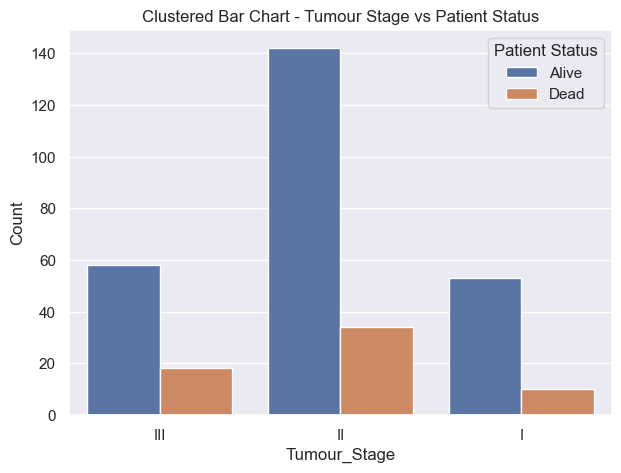

In [97]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Tumour_Stage', hue='Patient_Status', data=df)
plt.title('Clustered Bar Chart - Tumour Stage vs Patient Status')
plt.xlabel('Tumour_Stage')
plt.ylabel('Count')
plt.legend(title='Patient Status')
plt.show()

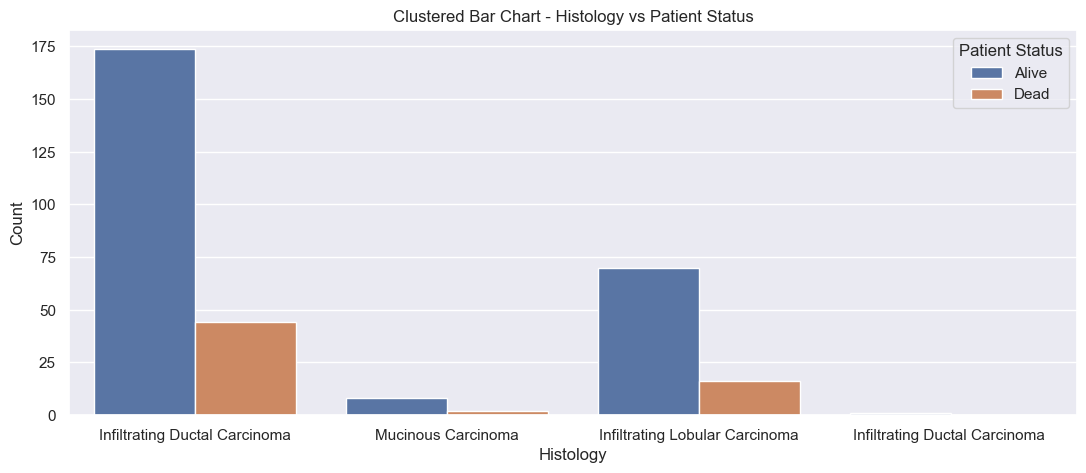

In [98]:
plt.figure(figsize=(13, 5))
sns.countplot(x='Histology', hue='Patient_Status', data=df)
plt.title('Clustered Bar Chart - Histology vs Patient Status')
plt.xlabel('Histology')
plt.ylabel('Count')
plt.legend(title='Patient Status')
plt.show()

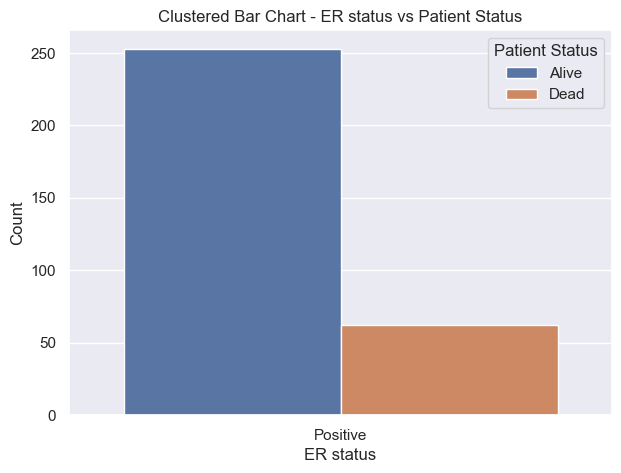

In [99]:
plt.figure(figsize=(7, 5))
sns.countplot(x='ER status', hue='Patient_Status', data=df)
plt.title('Clustered Bar Chart - ER status vs Patient Status')
plt.xlabel('ER status')
plt.ylabel('Count')
plt.legend(title='Patient Status')
plt.show()

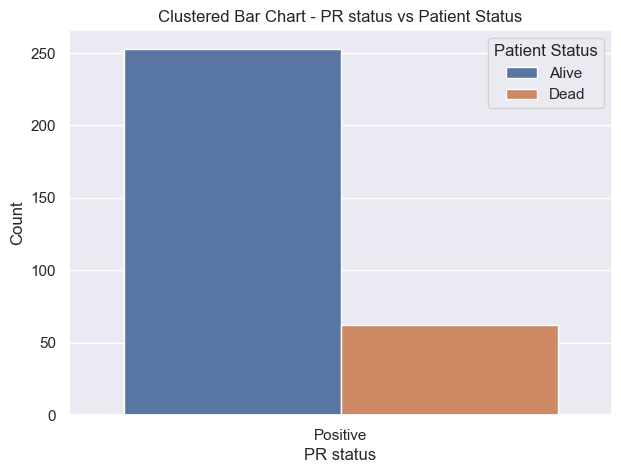

In [100]:
plt.figure(figsize=(7, 5))
sns.countplot(x='PR status', hue='Patient_Status', data=df)
plt.title('Clustered Bar Chart - PR status vs Patient Status')
plt.xlabel('PR status')
plt.ylabel('Count')
plt.legend(title='Patient Status')
plt.show()

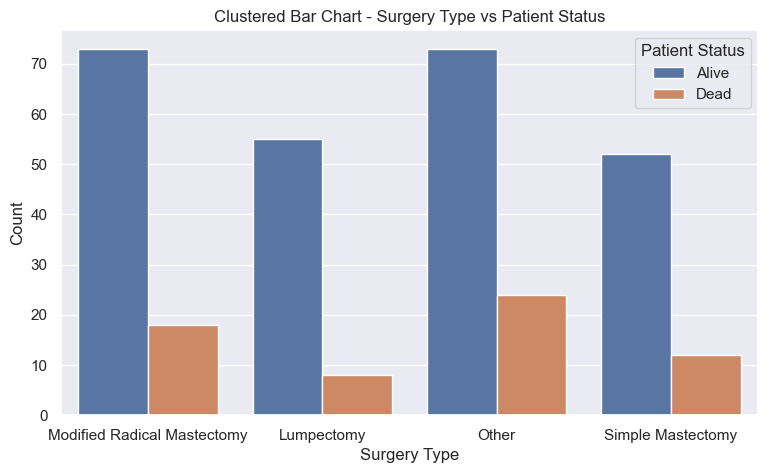

In [101]:
plt.figure(figsize=(9, 5))
sns.countplot(x='Surgery_type', hue='Patient_Status', data=df)
plt.title('Clustered Bar Chart - Surgery Type vs Patient Status')
plt.xlabel('Surgery Type')
plt.ylabel('Count')
plt.legend(title='Patient Status')
plt.show()

##### This section deals with Multivariate Analysis. Heatmap and Pairplot are used.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


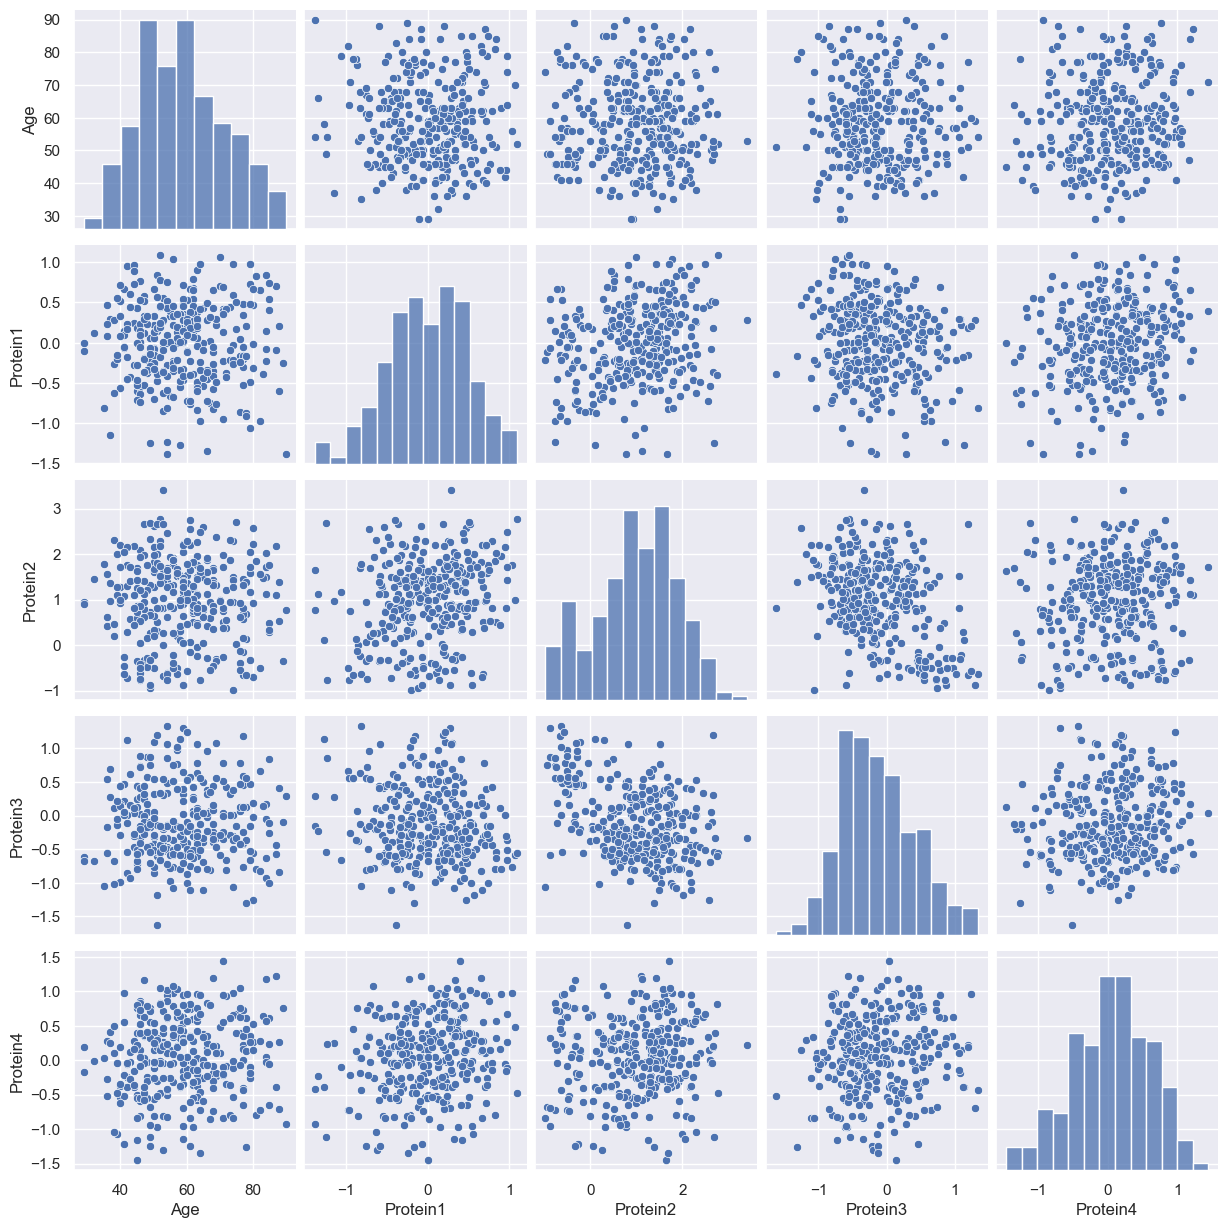

In [102]:
sns.pairplot(data = df)

In [103]:
heat_df = df.select_dtypes(include = np.number)
heat_df

,Age,Protein1,Protein2,Protein3,Protein4
0,36.0,0.080353,0.426380,0.54715,0.273680
1,43.0,-0.420320,0.578070,0.61447,-0.031505
2,69.0,0.213980,1.311400,-0.32747,-0.234260
3,56.0,0.345090,-0.211470,-0.19304,0.124270
4,56.0,0.221550,1.906800,0.52045,-0.311990
...,...,...,...,...,...
310,44.0,0.732720,1.111700,-0.26952,-0.354920
311,61.0,-0.719470,2.548500,-0.15024,0.339680
312,79.0,0.479400,2.055900,-0.53136,-0.188480
313,76.0,-0.244270,0.925560,-0.41823,-0.067848


<Axes: >

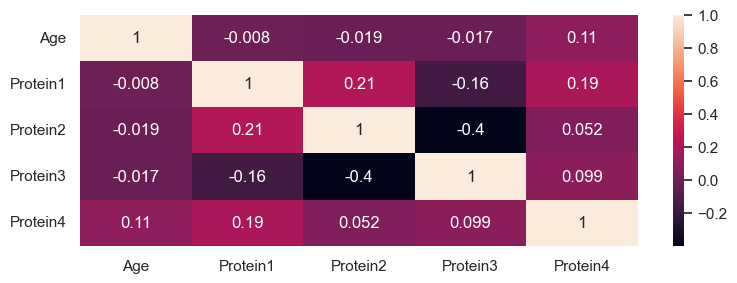

In [104]:
sns.heatmap(heat_df.corr(), annot = True, cbar = True)

#### This section deals with data preprocessing for Machine learning

In [105]:
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_10568\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


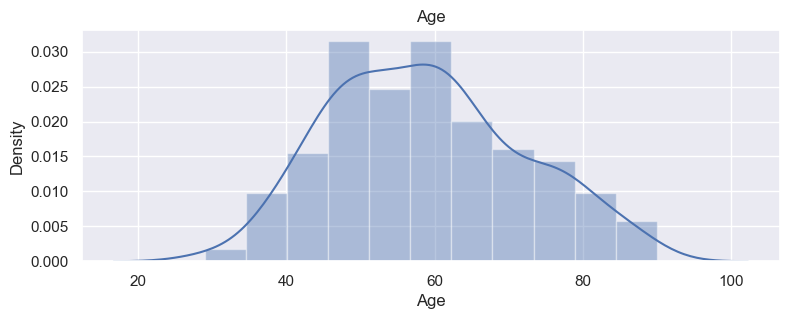

C:\Users\user\AppData\Local\Temp\ipykernel_10568\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


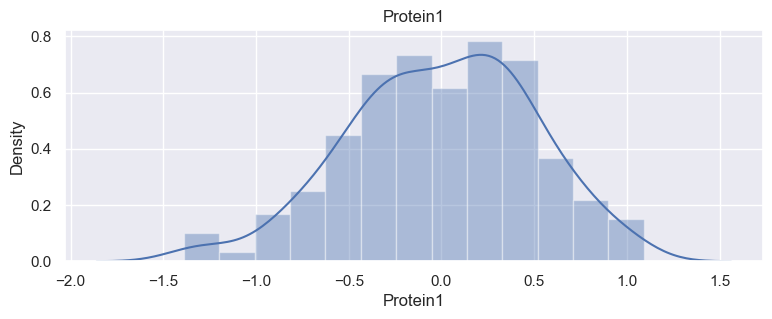

C:\Users\user\AppData\Local\Temp\ipykernel_10568\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


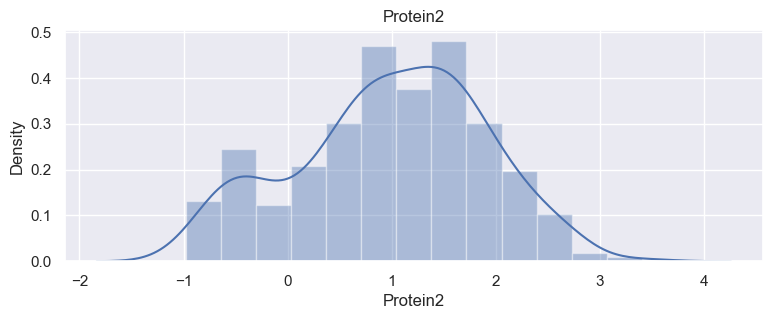

C:\Users\user\AppData\Local\Temp\ipykernel_10568\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


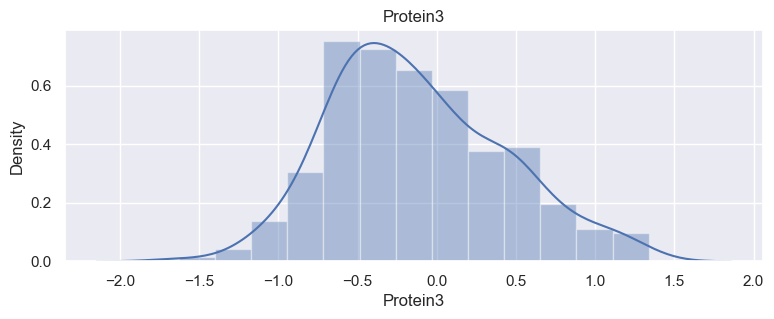

C:\Users\user\AppData\Local\Temp\ipykernel_10568\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


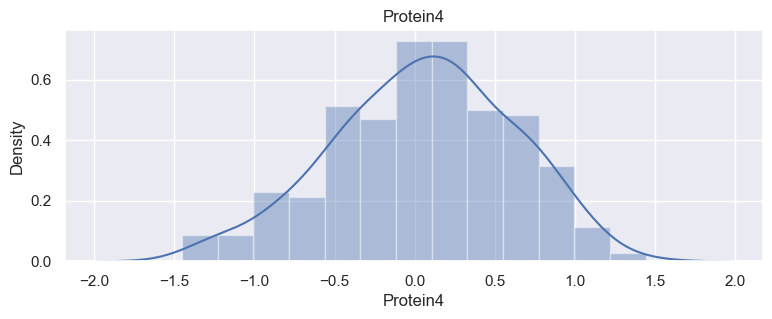

In [106]:
num_features = [num for num in df.columns if df[num].dtypes!='O' and df[num].dtypes != 'datetime64[ns]']

for features in num_features:
        sns.distplot(df[features])
        plt.title(features)
        plt.show()

In [107]:
for features in num_features:
    skew = df[features].skew()
    skew = round(skew, 2)
    print(features,skew)

Age 0.28
Protein1 -0.27
Protein2 -0.23
Protein3 0.41
Protein4 -0.22


In [108]:
# Clearly all the columns are within acceptable skewness level. Hence, feature selection procedure.
# Based on domain knowlege,even though the statistical tests suggests otherwise, it is key to retain the features selected.
# Thus the dates (Date of Surgery & Date f Last Vist) will be dropped and the rest retained.

In [109]:
df.drop(columns = ['Date_of_Surgery', 'Date_of_Last_Visit'], inplace = True)

In [110]:
# New df. To confrm operation
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.426380,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.578070,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.311400,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.211470,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.906800,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,44.0,MALE,0.732720,1.111700,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,Dead
311,61.0,FEMALE,-0.719470,2.548500,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
312,79.0,FEMALE,0.479400,2.055900,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Dead
313,76.0,FEMALE,-0.244270,0.925560,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead


In [111]:
# To split the DataFrame before Encoding. Target variable to be untouched
# Next is encode the features. One hot encoding is used

x = df.drop('Patient_Status', axis = 1)
y = df[['Patient_Status']]

In [112]:
# To confirm the operation(split)
x.head(3)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other


In [113]:
# To confirm the operation(split)
y.head(3)

,Patient_Status
0,Alive
1,Dead
2,Alive


In [114]:
# To encode
x = pd.get_dummies(x,dtype = int)

In [115]:
# To confirm operation
x

,Age,Protein1,Protein2,Protein3,Protein4,Gender_FEMALE,Gender_MALE,Tumour_Stage_I,Tumour_Stage_II,Tumour_Stage_III,...,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,ER status_Positive,PR status_Positive,HER2 status_Negative,HER2 status_Positive,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,36.0,0.080353,0.426380,0.54715,0.273680,1,0,0,0,1,...,0,0,1,1,1,0,0,1,0,0
1,43.0,-0.420320,0.578070,0.61447,-0.031505,1,0,0,1,0,...,0,1,1,1,1,0,1,0,0,0
2,69.0,0.213980,1.311400,-0.32747,-0.234260,1,0,0,0,1,...,0,0,1,1,1,0,0,0,1,0
3,56.0,0.345090,-0.211470,-0.19304,0.124270,1,0,0,1,0,...,0,0,1,1,1,0,0,1,0,0
4,56.0,0.221550,1.906800,0.52045,-0.311990,1,0,0,1,0,...,0,0,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,44.0,0.732720,1.111700,-0.26952,-0.354920,0,1,0,1,0,...,1,0,1,1,1,0,0,0,1,0
311,61.0,-0.719470,2.548500,-0.15024,0.339680,1,0,0,1,0,...,0,0,1,1,1,0,1,0,0,0
312,79.0,0.479400,2.055900,-0.53136,-0.188480,1,0,1,0,0,...,0,0,1,1,0,1,1,0,0,0
313,76.0,-0.244270,0.925560,-0.41823,-0.067848,1,0,1,0,0,...,0,0,1,1,1,0,1,0,0,0


In [116]:
# Normalization otherwise known as scaling is done on x
# Bring in the library
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler ()
scaled_features = [feature for feature in x.columns]
scaled_data = scaler.fit_transform(x)
x = pd.DataFrame(data = scaled_data, columns = scaled_features)
x

,Age,Protein1,Protein2,Protein3,Protein4,Gender_FEMALE,Gender_MALE,Tumour_Stage_I,Tumour_Stage_II,Tumour_Stage_III,...,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,ER status_Positive,PR status_Positive,HER2 status_Negative,HER2 status_Positive,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,0.114754,0.592541,0.320733,0.733332,0.596446,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.229508,0.390526,0.355358,0.756035,0.490941,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.655738,0.646457,0.522750,0.438381,0.420846,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.442623,0.699358,0.175136,0.483715,0.544794,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.442623,0.649512,0.658657,0.724328,0.393974,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.245902,0.855762,0.477166,0.457923,0.379133,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
311,0.524590,0.269823,0.805133,0.498149,0.619263,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
312,0.819672,0.753551,0.692691,0.369622,0.436673,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
313,0.770492,0.461560,0.434677,0.407773,0.478377,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


##### This section deals with Machine Learning proper

In [118]:
# Nest is to split the dataset into Train and Test set
# Bring in the library
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
# Display of the above operation
x_train

,Age,Protein1,Protein2,Protein3,Protein4,Gender_FEMALE,Gender_MALE,Tumour_Stage_I,Tumour_Stage_II,Tumour_Stage_III,...,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,ER status_Positive,PR status_Positive,HER2 status_Negative,HER2 status_Positive,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
221,0.278689,0.869117,0.343028,0.495812,0.551580,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
132,0.655738,0.680919,0.153182,0.910195,0.439777,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
155,0.344262,0.459155,0.297136,0.375557,0.221527,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
94,0.278689,0.300807,0.233764,0.479931,0.729347,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
245,0.409836,0.864275,0.598327,0.436566,0.798403,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.491803,0.671647,0.023422,0.986544,0.264454,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
71,0.868852,0.166018,0.109367,0.770694,0.253665,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
106,0.344262,0.612355,0.110942,0.655391,0.306914,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
270,0.540984,0.671090,0.424551,0.375574,0.493679,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [121]:
# The display of the train_split
y_train

,Patient_Status
221,Alive
132,Alive
155,Alive
94,Alive
245,Dead
...,...
188,Alive
71,Dead
106,Alive
270,Alive


In [122]:
# Next, is to do cross validation -(Hyperparameter tuning)
# This is to select the best fit classification model for the task
# Bring in the libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
random_seed = 42
np.random.seed(random_seed)

In [123]:
# Create a list of models to evaluate
models = [('RandomForest', RandomForestClassifier()),
          ('LogisticsRegression', LogisticRegression()),
          ('DecisionTree', DecisionTreeClassifier())]

In [124]:
# Nest, cross validation is performed to evaluate model
results = []
for name,model in models:
    kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_seed)
    cv_scores = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append((name,cv_scores.mean(),cv_scores.std()))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

In [125]:
for name, mean_score, std_score in results:
    print(f'{name}: Mean Accurracy = {mean_score:.4f}, std = {std_score:.4f}')

RandomForest: Mean Accurracy = 0.7937, std = 0.0193
LogisticsRegression: Mean Accurracy = 0.8056, std = 0.0074
DecisionTree: Mean Accurracy = 0.6825, std = 0.0280


In [127]:
# Nest is to train and test the data
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [128]:
# on seen data
model.score(x_train,y_train)

0.8055555555555556

In [129]:
# on unseen data
model.score(x_test,y_test)

0.7936507936507936

In [130]:
y_test

,Patient_Status
206,Alive
33,Alive
163,Dead
78,Alive
93,Alive
...,...
292,Alive
184,Alive
269,Alive
173,Alive


In [131]:
# When x_test is predicted by the model to produce y_test
y_pred = model.predict(x_test)
print(y_pred)

['Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive']


In [132]:
# Actual y_test transposed to match the apperance of the predicted outcome
horizontal_array = np.array([y_test]).flatten()
print(horizontal_array)

['Alive' 'Alive' 'Dead' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Dead'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Dead' 'Alive'
 'Alive' 'Dead' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Dead'
 'Alive' 'Dead' 'Alive' 'Dead' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Dead' 'Dead' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Dead' 'Alive' 'Alive' 'Alive' 'Dead' 'Dead' 'Alive' 'Dead'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive']


###### In evaluating the result of the model score, the following are used:¶
###### Accuracy Score
###### Classification Report
###### Classification Matrix

In [133]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7937


In [134]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Alive       0.79      1.00      0.88        50
        Dead       0.00      0.00      0.00        13

    accuracy                           0.79        63
   macro avg       0.40      0.50      0.44        63
weighted avg       0.63      0.79      0.70        63



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
# Classification Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[50  0]
 [13  0]]
